In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

In [ ]:

# Specify the path to your JSON file
json_file_path = "AMAZON_FASHION_5.json"

with open(json_file_path, "r") as json_file:
    data = []
    for line in json_file:
        json_object = json.loads(line)
        data.append(json_object)


In [ ]:
data

[{'overall': 5.0,
  'verified': True,
  'reviewTime': '09 4, 2015',
  'reviewerID': 'ALJ66O1Y6SLHA',
  'asin': 'B000K2PJ4K',
  'style': {'Size:': ' Big Boys', 'Color:': ' Blue/Orange'},
  'reviewerName': 'Tonya B.',
  'reviewText': 'Great product and price!',
  'summary': 'Five Stars',
  'unixReviewTime': 1441324800},
 {'overall': 5.0,
  'verified': True,
  'reviewTime': '09 4, 2015',
  'reviewerID': 'ALJ66O1Y6SLHA',
  'asin': 'B000K2PJ4K',
  'style': {'Size:': ' Big Boys', 'Color:': ' Black (37467610) / Red/White'},
  'reviewerName': 'Tonya B.',
  'reviewText': 'Great product and price!',
  'summary': 'Five Stars',
  'unixReviewTime': 1441324800},
 {'overall': 5.0,
  'verified': True,
  'reviewTime': '09 4, 2015',
  'reviewerID': 'ALJ66O1Y6SLHA',
  'asin': 'B000K2PJ4K',
  'style': {'Size:': ' Big Boys', 'Color:': ' Blue/Gray Logo'},
  'reviewerName': 'Tonya B.',
  'reviewText': 'Great product and price!',
  'summary': 'Five Stars',
  'unixReviewTime': 1441324800},
 {'overall': 5.0,
  

In [ ]:
new_data = []
for j in data:
    if "style" in j:
        j["Size"] = j["style"].get("Size:", None)
        j["Color"] = j["style"].get("Color:", None)
        j.pop("style")
    else:
        j["Size"] = None
        j["Color"] = None

    new_data.append(j)



In [ ]:
new_data

[{'overall': 5.0,
  'verified': True,
  'reviewTime': '09 4, 2015',
  'reviewerID': 'ALJ66O1Y6SLHA',
  'asin': 'B000K2PJ4K',
  'reviewerName': 'Tonya B.',
  'reviewText': 'Great product and price!',
  'summary': 'Five Stars',
  'unixReviewTime': 1441324800,
  'Size': ' Big Boys',
  'Color': ' Blue/Orange'},
 {'overall': 5.0,
  'verified': True,
  'reviewTime': '09 4, 2015',
  'reviewerID': 'ALJ66O1Y6SLHA',
  'asin': 'B000K2PJ4K',
  'reviewerName': 'Tonya B.',
  'reviewText': 'Great product and price!',
  'summary': 'Five Stars',
  'unixReviewTime': 1441324800,
  'Size': ' Big Boys',
  'Color': ' Black (37467610) / Red/White'},
 {'overall': 5.0,
  'verified': True,
  'reviewTime': '09 4, 2015',
  'reviewerID': 'ALJ66O1Y6SLHA',
  'asin': 'B000K2PJ4K',
  'reviewerName': 'Tonya B.',
  'reviewText': 'Great product and price!',
  'summary': 'Five Stars',
  'unixReviewTime': 1441324800,
  'Size': ' Big Boys',
  'Color': ' Blue/Gray Logo'},
 {'overall': 5.0,
  'verified': True,
  'reviewTime':

In [ ]:
df = pd.DataFrame(new_data)
df

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,Size,Color,vote,image
0,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Five Stars,1441324800,Big Boys,Blue/Orange,NaN,NaN
1,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Five Stars,1441324800,Big Boys,Black (37467610) / Red/White,NaN,NaN
2,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Five Stars,1441324800,Big Boys,Blue/Gray Logo,NaN,NaN
3,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Five Stars,1441324800,Big Boys,Blue (37867638-99) / Yellow,NaN,NaN
4,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Five Stars,1441324800,Big Boys,Blue/Pink,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3171,5.0,True,"07 2, 2018",A2077NII5H62R2,B005AGO4LU,Amazon Customer,Perfect fit!,Five Stars,1530489600,8.5 B(M) US,Green Glow/Seaweed - Hasta - White,NaN,NaN
3172,5.0,True,"06 28, 2018",A2IBS6PIPAGAB5,B005AGO4LU,J. Avila,My favorite cross trainers!,Comfortable,1530144000,5 B(M) US,Wolf Grey/Black-pink Blast/White,NaN,NaN
3173,5.0,True,"06 25, 2018",A1GTC5EVSJNCQ8,B005AGO4LU,Amazon Customer,Love them fit perfect,Five Stars,1529884800,8 B(M) US,Blue Tint/Green Glow/Hasta/White,NaN,NaN
3174,5.0,True,"06 20, 2018",A311XHHLM12MUT,B005AGO4LU,Peter,Favorite Nike shoe ever! The flex sole is exce...,Love them!,1529452800,9 B(M) US,Blue Tint/Green Glow/Hasta/White,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3176 entries, 0 to 3175
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall         3176 non-null   float64
 1   verified        3176 non-null   bool   
 2   reviewTime      3176 non-null   object 
 3   reviewerID      3176 non-null   object 
 4   asin            3176 non-null   object 
 5   reviewerName    3176 non-null   object 
 6   reviewText      3160 non-null   object 
 7   summary         3176 non-null   object 
 8   unixReviewTime  3176 non-null   int64  
 9   Size            3102 non-null   object 
 10  Color           3095 non-null   object 
 11  vote            297 non-null    object 
 12  image           106 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(10)
memory usage: 301.0+ KB


In [ ]:
print("\nDistribution of ratings:")
print(df['overall'].value_counts())
print("Average rating:", df['overall'].mean())



Distribution of ratings:
overall
5.0    2158
4.0     471
3.0     337
1.0     117
2.0      93
Name: count, dtype: int64
Average rating: 4.404282115869018


In [ ]:
print("Number of Unique Reviewers:", df['reviewerID'].nunique())
print("Number of Unique Products:", df['asin'].nunique())

Number of Unique Reviewers: 406
Number of Unique Products: 31


In [ ]:
# Counts and averages
print("Number of products:", df['asin'].nunique())
print("Number of reviews:", df["reviewText"].count())


Number of products: 31
Number of reviews: 3160


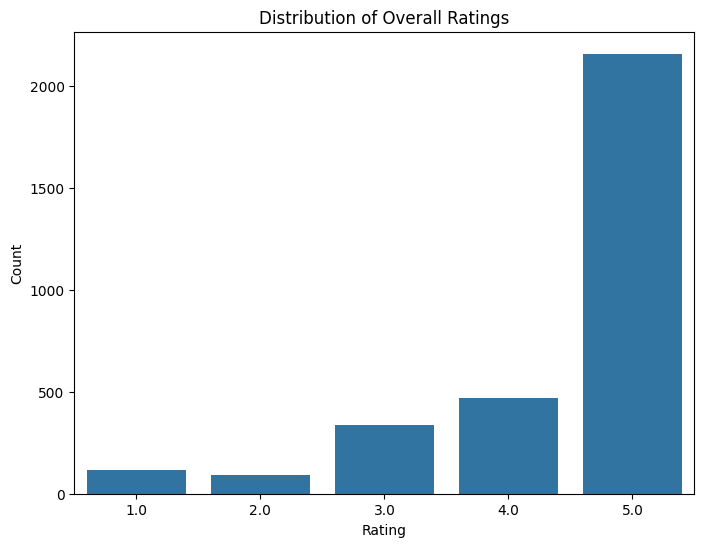

In [ ]:
# Distribution of overall ratings
plt.figure(figsize=(8, 6))
sns.countplot(x=df['overall'], data=df)
plt.title('Distribution of Overall Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

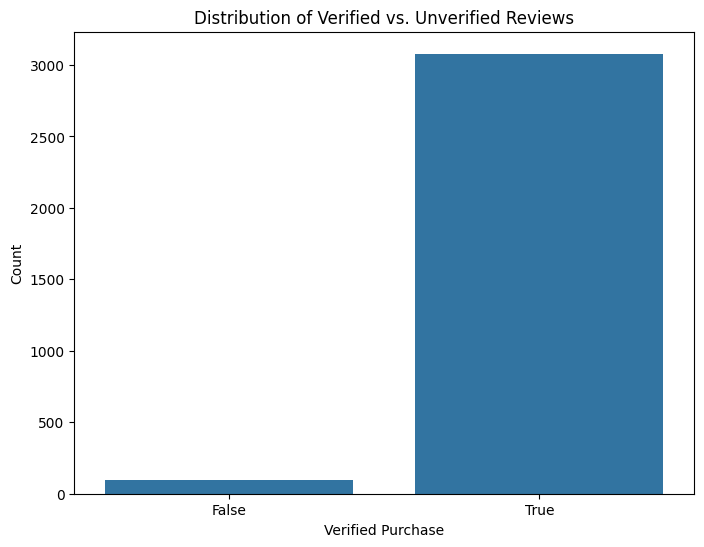

In [ ]:
# Distribution of verified vs. unverified reviews
plt.figure(figsize=(8, 6))
sns.countplot(x=df['verified'], data=df)
plt.title('Distribution of Verified vs. Unverified Reviews')
plt.xlabel('Verified Purchase')
plt.ylabel('Count')
plt.show()

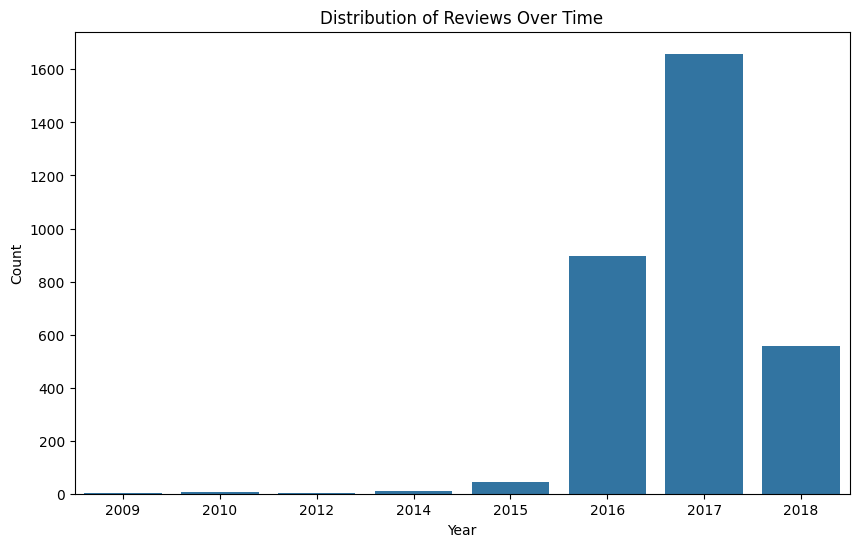

In [ ]:
# Distribution of reviews over time
df['reviewTime'] = pd.to_datetime(df['reviewTime'])
df['year'] = df['reviewTime'].dt.year
plt.figure(figsize=(10, 6))
sns.countplot(x=df['year'], data=df)
plt.title('Distribution of Reviews Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

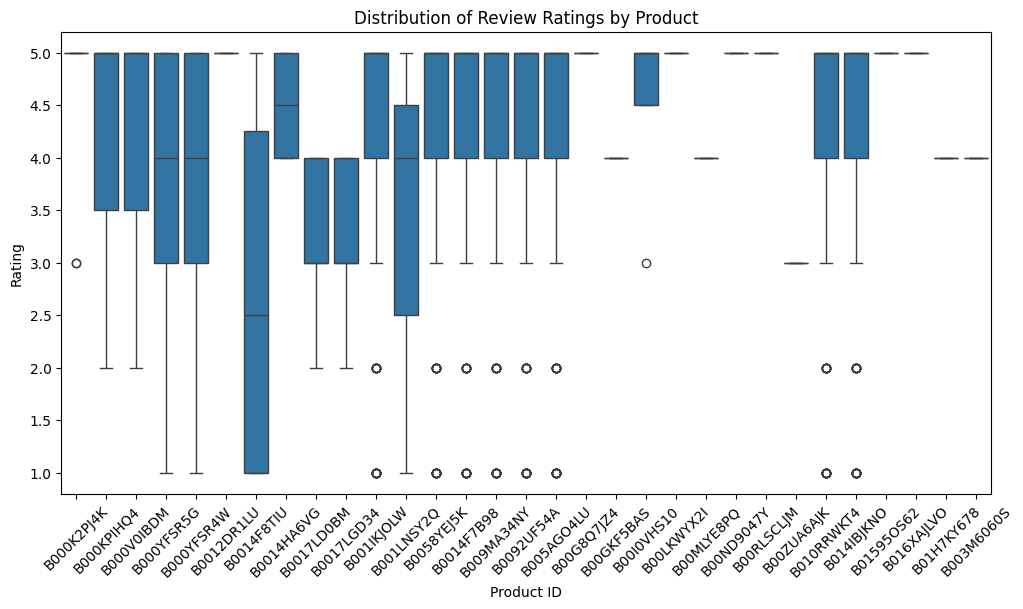

In [ ]:
# Distribution of review ratings by product
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['asin'], y=df['overall'], data=df)
plt.title('Distribution of Review Ratings by Product')
plt.xlabel('Product ID')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

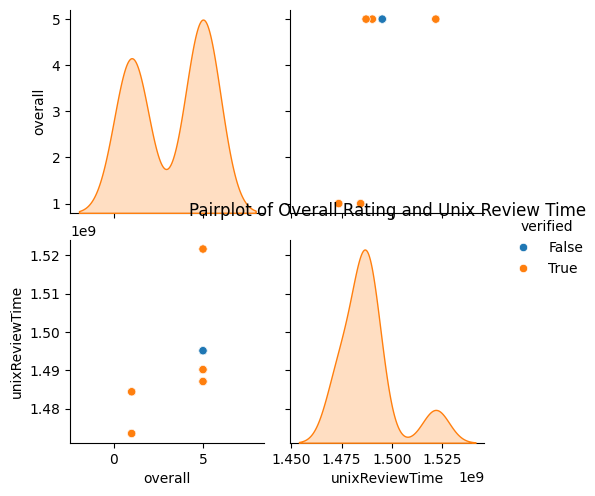

In [ ]:
sns.pairplot(df.dropna(), vars=['overall', 'unixReviewTime'], hue='verified')
plt.title('Pairplot of Overall Rating and Unix Review Time')
plt.show()

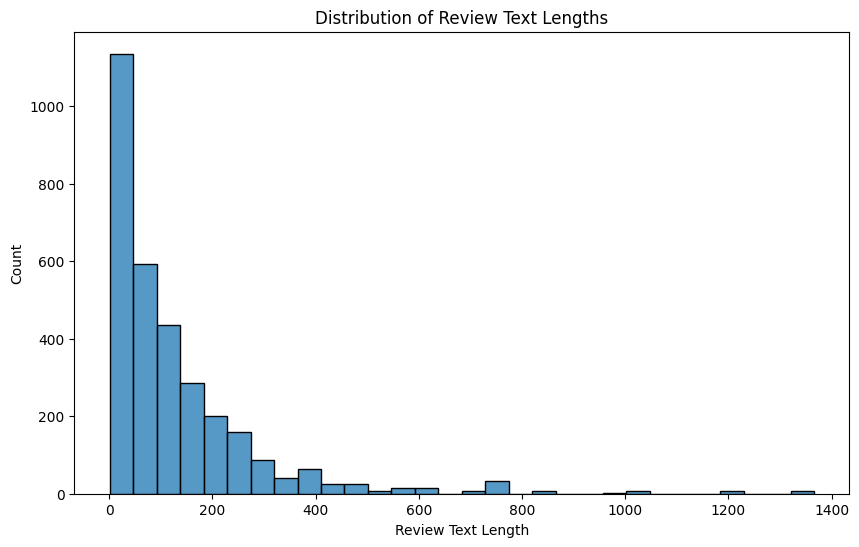

In [ ]:
# Distribution of review text lengths
df['reviewTextLength'] = df['reviewText'].str.len()
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x=df['reviewTextLength'], bins=30)
plt.title('Distribution of Review Text Lengths')
plt.xlabel('Review Text Length')
plt.ylabel('Count')
plt.show()

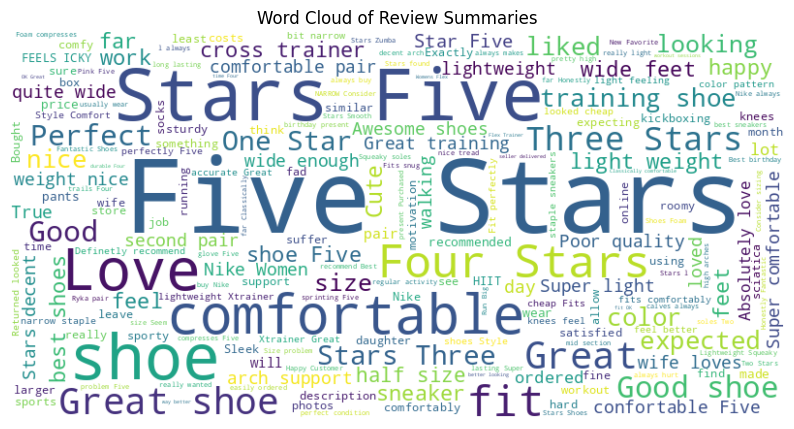

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud

wordcloud_text = ' '.join(df['summary'].dropna())
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Review Summaries')
plt.axis('off')
plt.show()

In [ ]:
# Group by 'asin' (product identifier) and 'reviewerID', and count occurrences
product_rating_counts = df.groupby(['asin', 'reviewerID', 'overall']).size().reset_index(name='rating_count')

# Filter for instances where the same product receives the same rating from the same reviewer ID
same_rating_same_reviewer = product_rating_counts[product_rating_counts['rating_count'] > 1]

# Print the result
print(same_rating_same_reviewer)

            asin      reviewerID  overall  rating_count
0     B000K2PJ4K  A3W11493KS6Z2L      3.0             2
1     B000K2PJ4K  A3W11493KS6Z2L      5.0             3
2     B000K2PJ4K   ALJ66O1Y6SLHA      5.0             5
3     B000KPIHQ4  A265UZVOZWTTXQ      5.0             3
6     B000KPIHQ4   AW8UBYMNJ894V      5.0             2
...          ...             ...      ...           ...
2545  B010RRWKT4  A3OP70LPLALBKN      5.0             2
2653  B010RRWKT4   AT7UEQ7UJB0RU      5.0             2
2872  B014IBJKNO  A37K0VP2H8FKOU      4.0             2
2917  B014IBJKNO  A3OP70LPLALBKN      5.0             2
3025  B014IBJKNO   AT7UEQ7UJB0RU      5.0             2

[88 rows x 4 columns]


In [ ]:
# Step a: Label the data based on product ratings
def label_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:
        return 'negative'

In [ ]:

df['sentiment'] = df['overall'].apply(label_sentiment)

# Step b: Choose appropriate columns for sentiment analysis
sentiment_df = df[['reviewText', 'overall', 'sentiment']]

In [ ]:
# import nltk
# nltk.download('stopwords')

In [ ]:
# 'reviewText' column:
# This column contains the actual text of the reviews left by customers.
# Textual data is essential for sentiment analysis as it provides context and specific information

# 'overall' column:
# This column represents the overall rating assigned to the product by the reviewer.
# While the textual content of reviews is crucial for sentiment analysis, the overall rating serves as a numeric indicator of sentiment.

# sentiment' column:
# This column is created based on the values in the 'overall' column, where ratings are mapped to sentiment labels (Positive, Neutral, or Negative) according to predefined criteria.
# Including this column allows us to easily access the sentiment labels assigned to each review without needing to refer to the numerical ratings directly.
# lenght vs rating relationship -check if the lenght of the sentence

<ipython-input-25-4238fb666997>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df['review_length'] = sentiment_df['reviewText'].apply(lambda x: len(str(x).split()))


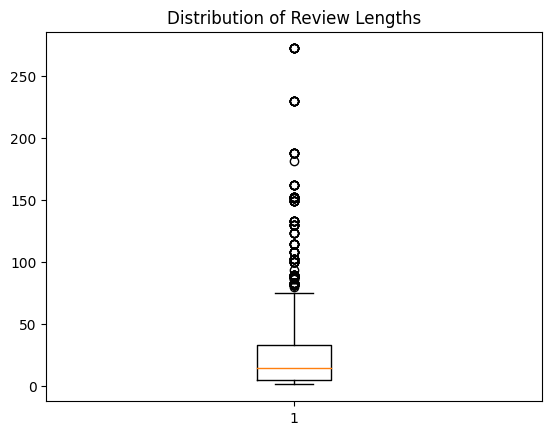

In [ ]:
# Step c: Check for outliers
# Compute the length of each review text
sentiment_df['review_length'] = sentiment_df['reviewText'].apply(lambda x: len(str(x).split()))

# Plot boxplot for review length to identify outliers
plt.boxplot(sentiment_df['review_length'])
plt.title('Distribution of Review Lengths')
plt.show()

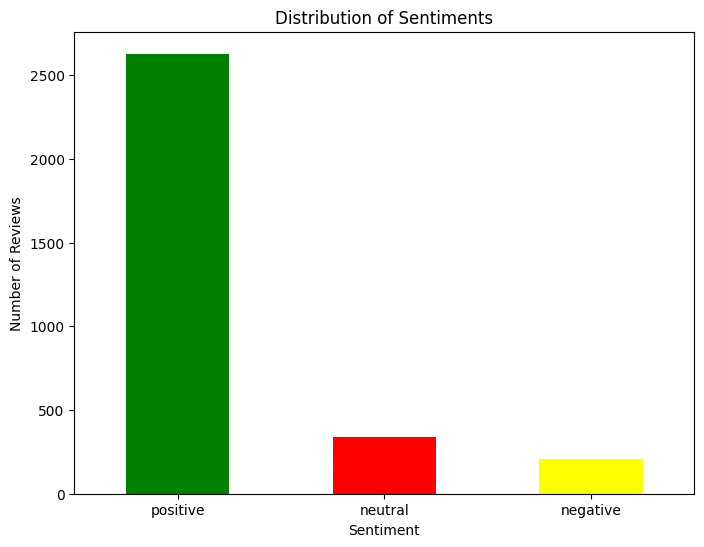

In [ ]:
import matplotlib.pyplot as plt

# Group by 'sentiment' and count the number of reviews for each sentiment
sentiment_counts = sentiment_df['sentiment'].value_counts()

# Plot the bar plot
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'yellow'])
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()


In [ ]:
import pandas as pd


ranges = [(1, 50), (51, 100), (100, 150),(151,200),(201,250),(251,300),(301,1000)]
counts = {range_: 0 for range_ in ranges}

for length in sentiment_df['review_length'].values:
    for range_ in ranges:
        if length >= range_[0] and length < range_[1]:
            counts[range_] += 1
            break

# Print the counts for each range
for range_, count in counts.items():
    print(f"Reviews between {range_[0]} and {range_[1]}: {count}")


Reviews between 1 and 50: 2767
Reviews between 51 and 100: 282
Reviews between 100 and 150: 62
Reviews between 151 and 200: 33
Reviews between 201 and 250: 8
Reviews between 251 and 300: 8
Reviews between 301 and 1000: 0


sentiment
positive    2311
neutral      280
negative     192
Name: count, dtype: int64
sentiment
positive    239
neutral      33
negative     18
Name: count, dtype: int64
sentiment
positive    38
neutral     16
Name: count, dtype: int64
sentiment
positive    25
neutral      8
Name: count, dtype: int64
sentiment
positive    8
Name: count, dtype: int64
sentiment
positive    8
Name: count, dtype: int64


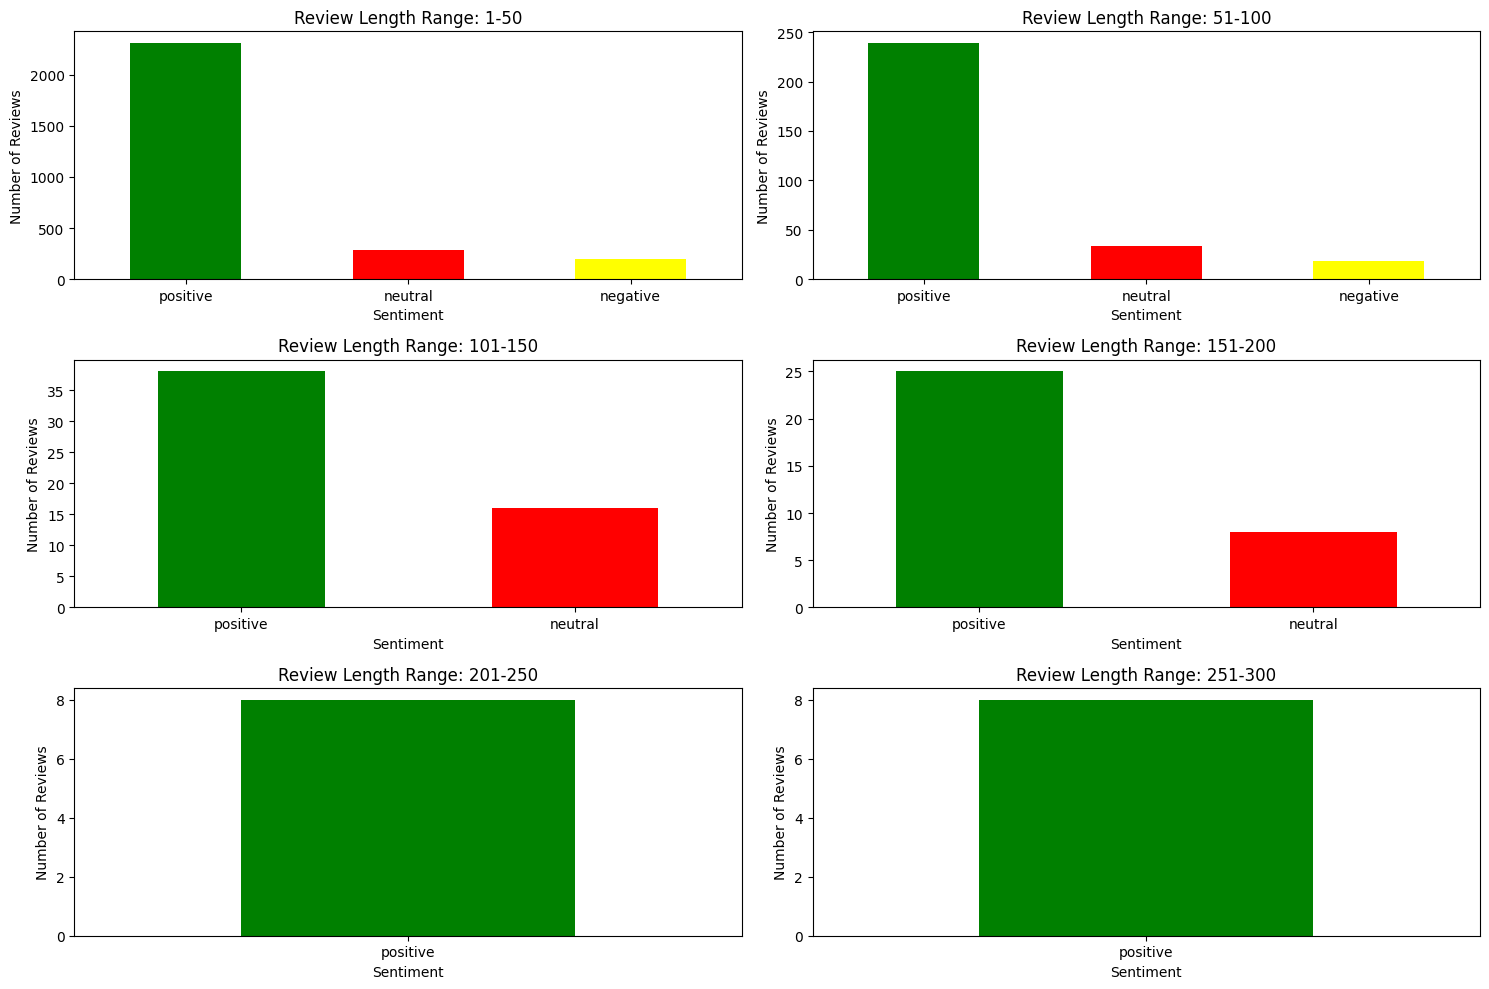

In [ ]:
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 10))

# Define review length ranges
review_length_ranges = [(1, 50), (51, 100), (101, 150), (151, 200), (201, 250), (251, 300)]

# Iterate through each subplot and review length range
for i, ax in enumerate(axes.flatten()):
    # Filter DataFrame for review lengths within the current range
    reviews_in_range = sentiment_df[(sentiment_df['review_length'] >= review_length_ranges[i][0]) &
                                    (sentiment_df['review_length'] <= review_length_ranges[i][1])]

    # Count the occurrences of each sentiment
    sentiment_counts = reviews_in_range['sentiment'].value_counts()
    print(sentiment_counts)

    # Plot the counts for each sentiment
    sentiment_counts.plot(kind='bar', ax=ax, color=['green', 'red', 'yellow'])
    ax.set_title(f'Review Length Range: {review_length_ranges[i][0]}-{review_length_ranges[i][1]}')
    ax.set_xlabel('Sentiment')
    ax.set_ylabel('Number of Reviews')
    ax.set_xticklabels(sentiment_counts.index, rotation=0)

# Adjust layout
plt.tight_layout()
plt.show()



In [ ]:
# Define the list of review length ranges
review_length_ranges = [(1, 50), (51, 100), (101, 150), (151, 200), (201, 250), (251, 300)]

# Calculate correlation for each range and sentiment
correlation_by_range_and_sentiment = {}

# Iterate through each length range
for range_ in review_length_ranges:
    # Filter DataFrame for reviews within the current length range
    reviews_in_range = sentiment_df[(sentiment_df['review_length'] >= range_[0]) &
                                    (sentiment_df['review_length'] <= range_[1])]

    # Calculate correlation for each sentiment within the current length range
    correlation_by_sentiment_in_range = {}

    # Iterate through each sentiment category
    for sentiment in reviews_in_range['sentiment'].unique():
        # Filter DataFrame for reviews with the current sentiment within the current length range
        reviews_with_sentiment_in_range = reviews_in_range[reviews_in_range['sentiment'] == sentiment]

        # Calculate Pearson correlation coefficient for this sentiment within the current length range
        correlation = reviews_with_sentiment_in_range['review_length'].corr(reviews_with_sentiment_in_range['overall'])

        # Store the correlation coefficient for this sentiment within the current length range
        correlation_by_sentiment_in_range[sentiment] = correlation

    # Store the correlation coefficients for this length range
    correlation_by_range_and_sentiment[range_] = correlation_by_sentiment_in_range

# Print the correlation coefficients for each range and sentiment
for range_, correlations in correlation_by_range_and_sentiment.items():
    print(f"Correlation coefficients for range {range_}:")
    for sentiment, correlation in correlations.items():
        print(f"- {sentiment} sentiment: {correlation}")


Correlation coefficients for range (1, 50):
- positive sentiment: -0.2009496332294866
- neutral sentiment: nan
- negative sentiment: 0.1517161661644738
Correlation coefficients for range (51, 100):
- negative sentiment: 0.922730984255015
- positive sentiment: -0.2563813402539682
- neutral sentiment: nan
Correlation coefficients for range (101, 150):
- positive sentiment: 0.7219129604626335
- neutral sentiment: nan
Correlation coefficients for range (151, 200):
- positive sentiment: 0.9603366752968899
- neutral sentiment: nan
Correlation coefficients for range (201, 250):
- positive sentiment: nan
Correlation coefficients for range (251, 300):
- positive sentiment: nan


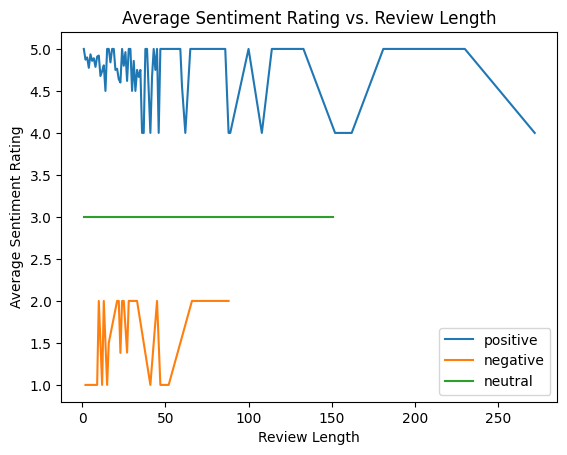

In [ ]:
import matplotlib.pyplot as plt

# Define the sentiment categories
sentiments = ['positive', 'negative', 'neutral']

# Iterate over each sentiment
for sentiment in sentiments:
    # Filter the dataset for the specific sentiment category
    filtered_data = sentiment_df[sentiment_df['sentiment'] == sentiment]

    # Calculate the average sentiment rating for each review length
    average_sentiment = filtered_data.groupby('review_length')['overall'].mean()

    # Plot the trend
    plt.plot(average_sentiment.index, average_sentiment.values, label=sentiment)

# Set plot labels and legend
plt.xlabel('Review Length')
plt.ylabel('Average Sentiment Rating')
plt.title('Average Sentiment Rating vs. Review Length')
plt.legend()
plt.show()


In [ ]:
# outliers

if_condition = (sentiment_df['review_length'] > 150)


if if_condition.any():

    outliers = sentiment_df[if_condition]
    print("Reviews with extreme lengths (outliers):")
    print(outliers[['reviewText', 'review_length', 'overall', 'sentiment']])
else:
    print("No reviews with extreme lengths found.")



Reviews with extreme lengths (outliers):
                                             reviewText  review_length  \
204   Very good overall.\nNow Ive been a huge Sketch...            162   
211   Super light-weight, decent arch support (mine ...            188   
217   These are a bit longer than they should be. I ...            151   
431   i bought a pair from DSW for 50$ and they are ...            152   
467   Favorite training and walking-around sneakers....            230   
502   I am a recess aide and on my feet all day long...            272   
567   Very good overall.\nNow Ive been a huge Sketch...            162   
574   Super light-weight, decent arch support (mine ...            188   
580   These are a bit longer than they should be. I ...            151   
794   i bought a pair from DSW for 50$ and they are ...            152   
830   Favorite training and walking-around sneakers....            230   
865   I am a recess aide and on my feet all day long...            272 

In [ ]:
# 1. VADER (Valence Aware Dictionary and Sentiment Reasoner):
# Justification:
# VADER is specifically designed for sentiment analysis and is known for its high accuracy, especially with social media text and informal language.
# It provides a ready-to-use lexicon with pre-trained sentiment scores for words, including negation handling and sensitivity to punctuation and capitalization.
# VADER is easy to use and doesn't require extensive parameter tuning.
# Pre-processing:
# For VADER, we'll perform minimal pre-processing to retain the original structure of the text, as VADER is designed to handle informal language well.
# Lowercasing: Convert all text to lowercase to ensure consistent sentiment analysis regardless of capitalization.
# Punctuation Removal: We won't remove punctuation as VADER is sensitive to it and uses it to infer sentiment intensity.
# Stopwords Removal: We won't remove stopwords as VADER is designed to handle them effectively.
# Lemmatization/Stemming: Since VADER works well with informal language, we may skip this step to preserve the originality of words.
# 2. TextBlob:
# Justification:
# TextBlob provides a simple API for common natural language processing (NLP) tasks, including sentiment analysis.
# It offers a sentiment analysis model trained on a large dataset, making it suitable for general-purpose sentiment analysis.
# TextBlob is easy to use and integrates well with Python-based NLP pipelines.
# Pre-processing:
# For TextBlob, we'll perform standard pre-processing steps to improve the accuracy of sentiment analysis:
# Lowercasing: Convert all text to lowercase to ensure consistent sentiment analysis.
# Punctuation Removal: Remove punctuation marks, as they typically don't contribute to sentiment analysis and may introduce noise.
# Stopwords Removal: Remove common stopwords to focus on content words that carry sentiment.
# Lemmatization/Stemming: Reduce words to their base form to normalize variations and improve sentiment analysis accuracy.

In [ ]:
# number 4 preprocessing
!pip install textblob

In [ ]:
!pip install vaderSentiment
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import string

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.5 MB/s eta 0:00:00


In [ ]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# ! pip install pyspellchecker

In [ ]:
# from spellchecker import SpellChecker
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def preprocessing_text(text, model='vader'):
    # Handle cases where text is not a string (e.g., NaN)
    if not isinstance(text, str):
        return ''

    if model == 'vader':
        return text
    elif model == 'textblob':
        text = text.lower()

        # Remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))

        # Tokenize
        tokens = word_tokenize(text)

        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word not in stop_words]

        # Lemmatize
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]

#         # clean_text = re.sub(r'\b\d+\b', '<NUM>', text)
#         # Spell check and correction
#         spell = SpellChecker()
#         corrected_text = []
#         misspelled_words = []
#         for word in tokens:
#             # Check if the word is misspelled
#             if word.lower() not in spell:
#                 # Get the most likely correct spelling
#                 corrected_word = spell.correction(word)
#                 if corrected_word is not None:  # Check if correction exists
#                     corrected_text.append(corrected_word)
#                     misspelled_words.append((word, corrected_word))
#             else:
#                 corrected_text.append(word)


        # Join the tokens back into a single string
        return ' '.join(tokens)
    else:
        raise ValueError('Invalid model specified')


In [ ]:
# vader sentiment analyzer
vader_analyser = SentimentIntensityAnalyzer()
# number 5
from random import random
# randomly selecting 1000 reviews


selected_reviews = df.sample(n=1000, random_state=42)

In [ ]:
vader_sentiments = []
textblob_sentiments = []



In [ ]:
# 6
for review in selected_reviews['reviewText']:
  # preprocess the review text with both models
  preprocessed_text_vader = preprocessing_text(review,model='vader')
  preprocessed_text_textblob = preprocessing_text(review, model = 'textblob')

  # sentiment analysis _ vader
  vader_score = vader_analyser.polarity_scores(preprocessed_text_vader)
  if vader_score['compound'] >= 0.05:  # VADER threshold for positive sentiment
          vader_sentiments.append('positive')
  elif vader_score['compound'] <= -0.05:  # VADER threshold for negative sentiment
          vader_sentiments.append('negative')
  else:
          vader_sentiments.append('neutral')
  # sentiment analysis - textblob
  textblob_score = TextBlob(preprocessed_text_textblob).sentiment.polarity
  if textblob_score > 0:
        textblob_sentiments.append('positive')
  elif textblob_score < 0:
      textblob_sentiments.append('negative')
  else:
      textblob_sentiments.append('neutral')

In [ ]:
# Add the predicted sentiments to the selected_reviews DataFrame
selected_reviews['vader_sentiment'] = vader_sentiments
selected_reviews['textblob_sentiment'] = textblob_sentiments

In [ ]:
def calculate_accuracy(predictions, ground_truth):
  correct_predictions = sum(predictions == ground_truth)
  accuracy = correct_predictions / len(ground_truth)
  return accuracy


In [ ]:
vader_accuracy = calculate_accuracy(selected_reviews['vader_sentiment'], selected_reviews['sentiment'])
textblob_accuracy = calculate_accuracy(selected_reviews['textblob_sentiment'], selected_reviews['sentiment'])


In [ ]:
# 7
comparison_table = pd.DataFrame({
    'Model': ['VADER', 'TextBlob'],
    'Accuracy': [vader_accuracy, textblob_accuracy]
})

In [ ]:
print(comparison_table)

      Model  Accuracy
0     VADER     0.812
1  TextBlob     0.811


In [ ]:
from sklearn.metrics import confusion_matrix

# True sentiments from the dataset
true_sentiments = selected_reviews['sentiment']

# Predicted sentiments from VADER and TextBlob
vader_predicted_sentiments = selected_reviews['vader_sentiment']
textblob_predicted_sentiments = selected_reviews['textblob_sentiment']

# Confusion matrix for VADER
vader_confusion_matrix = confusion_matrix(true_sentiments, vader_predicted_sentiments)

# Confusion matrix for TextBlob

textblob_confusion_matrix = confusion_matrix(true_sentiments, textblob_predicted_sentiments)

# Display the confusion matrices
print("Confusion matrix for VADER:")
print(vader_confusion_matrix)
print()

print("Confusion matrix for TextBlob:")
print(textblob_confusion_matrix)


Confusion matrix for VADER:
[[ 21  19  22]
 [ 14  15  72]
 [ 17  44 776]]

Confusion matrix for TextBlob:
[[ 26  13  23]
 [ 16   9  76]
 [ 18  43 776]]


In [ ]:
selected_reviews['sentiment'].value_counts()

sentiment
positive    837
neutral     101
negative     62
Name: count, dtype: int64

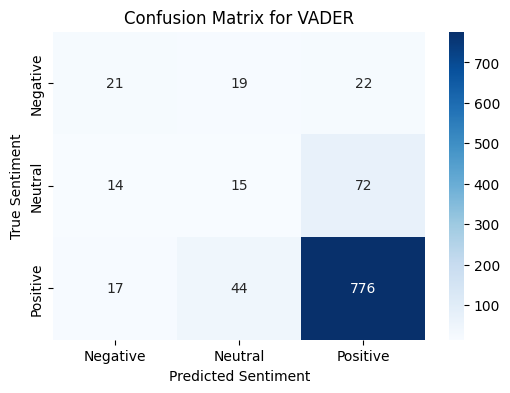

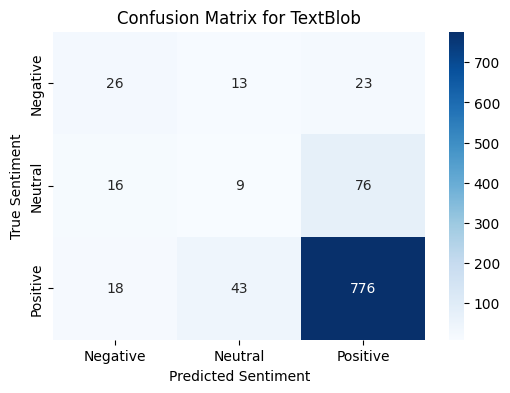

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, model_name):
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative', 'Neutral', 'Positive'],
                yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Sentiment')
    plt.ylabel('True Sentiment')
    plt.show()

# Plot confusion matrix for VADER
plot_confusion_matrix(vader_confusion_matrix, 'VADER')

# Plot confusion matrix for TextBlob
plot_confusion_matrix(textblob_confusion_matrix, 'TextBlob')


In [ ]:
from sklearn.metrics import classification_report

# Define true sentiments from the dataset
true_sentiments = selected_reviews['sentiment']

# Define predicted sentiments from VADER and TextBlob
vader_predicted_sentiments = selected_reviews['vader_sentiment']
textblob_predicted_sentiments = selected_reviews['textblob_sentiment']

# Print classification report for VADER
vader_report = classification_report(true_sentiments, vader_predicted_sentiments, output_dict=True)
textblob_report = classification_report(true_sentiments, textblob_predicted_sentiments, output_dict=True)

print("Classification Report for VADER:")
print(classification_report(true_sentiments, vader_predicted_sentiments))
print()

# Print classification report for TextBlob
print("Classification Report for TextBlob:")
print(classification_report(true_sentiments, textblob_predicted_sentiments))


Classification Report for VADER:
              precision    recall  f1-score   support

    negative       0.40      0.34      0.37        62
     neutral       0.19      0.15      0.17       101
    positive       0.89      0.93      0.91       837

    accuracy                           0.81      1000
   macro avg       0.50      0.47      0.48      1000
weighted avg       0.79      0.81      0.80      1000


Classification Report for TextBlob:
              precision    recall  f1-score   support

    negative       0.43      0.42      0.43        62
     neutral       0.14      0.09      0.11       101
    positive       0.89      0.93      0.91       837

    accuracy                           0.81      1000
   macro avg       0.49      0.48      0.48      1000
weighted avg       0.78      0.81      0.80      1000



In [ ]:
print(selected_reviews.columns)
selected_reviews_copy = selected_reviews.copy()

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'Size',
       'Color', 'vote', 'image', 'year', 'reviewTextLength', 'sentiment',
       'vader_sentiment', 'textblob_sentiment'],
      dtype='object')


In [ ]:
#phase 2
missing_values = df.isnull().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
overall                0
verified               0
reviewTime             0
reviewerID             0
asin                   0
reviewerName           0
reviewText            16
summary                0
unixReviewTime         0
Size                  74
Color                 81
vote                2879
image               3070
year                   0
reviewTextLength      16
sentiment              0
dtype: int64


In [ ]:
# df_cleaned = df.dropna()
# missing_values = df_cleaned.isnull().sum()
# print(missing_values)
# df_cleaned

In [ ]:

# Select a subset of the original data with a minimum of 2000 reviews
subset_data = df.sample(n=2000, random_state=42)
subset_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 2270 to 2028
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   overall           2000 non-null   float64       
 1   verified          2000 non-null   bool          
 2   reviewTime        2000 non-null   datetime64[ns]
 3   reviewerID        2000 non-null   object        
 4   asin              2000 non-null   object        
 5   reviewerName      2000 non-null   object        
 6   reviewText        1991 non-null   object        
 7   summary           2000 non-null   object        
 8   unixReviewTime    2000 non-null   int64         
 9   Size              1951 non-null   object        
 10  Color             1946 non-null   object        
 11  vote              182 non-null    object        
 12  image             66 non-null     object        
 13  year              2000 non-null   int32         
 14  reviewTextLength  1991 non

In [ ]:
# print("First few rows of the subset data:")
print(subset_data.head())

      overall  verified reviewTime      reviewerID        asin  \
2270      5.0     False 2016-10-24  A1TEBP1FCCJW5V  B005AGO4LU   
442       5.0      True 2016-10-29  A2CP5A30XO5JUO  B001IKJOLW   
2886      5.0      True 2017-07-18  A1PFKS00R93MRZ  B014IBJKNO   
1655      5.0      True 2018-02-14  A2QRWCN5YR05G9  B0092UF54A   
1001      4.0      True 2017-07-18  A23H50RT6SLXY9  B0014F7B98   

         reviewerName                                         reviewText  \
2270  Amazon Customer  These shoes are great.  This is the second pai...   
442          Aaron O.  Love them!  Very comfortable and great for wei...   
2886    Rakesh Duneja  This is a very attractive shoe. It is true to ...   
1655  Amazon Customer                                  Very confortable.   
1001   Edle Liljeblad                       Fits good, very lightweight.   

                                                summary  unixReviewTime  \
2270                           Really Comfortable Shoes      1477267200

In [ ]:
print("\nDistribution of ratings:")
print(subset_data['overall'].value_counts())
print("Average rating:", subset_data['overall'].mean())


Distribution of ratings:
overall
5.0    1359
4.0     298
3.0     207
1.0      78
2.0      58
Name: count, dtype: int64
Average rating: 4.401


In [ ]:
# Counts and averages
print("Number of products:", subset_data['asin'].nunique())
print("Number of reviews:", subset_data["reviewText"].count())



print("Number of Unique Reviewers:", subset_data['reviewerID'].nunique())
print("Number of Unique Products:", subset_data['asin'].nunique())


Number of products: 26
Number of reviews: 1991
Number of Unique Reviewers: 405
Number of Unique Products: 26


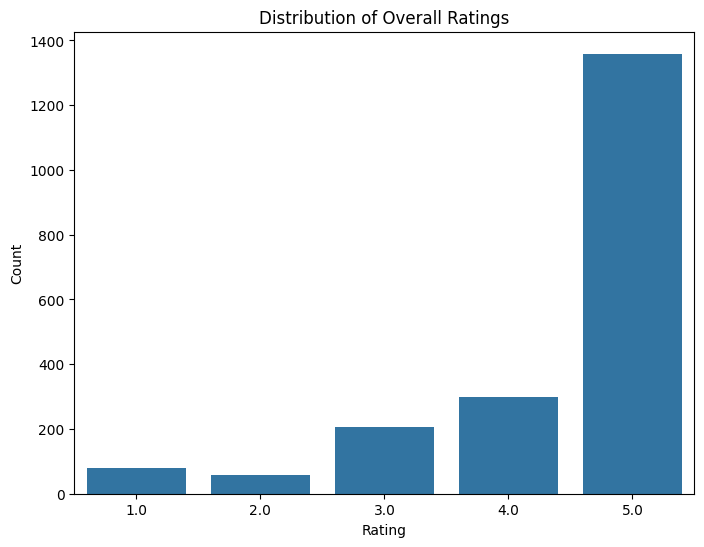

In [ ]:

# Distribution of overall ratings
plt.figure(figsize=(8, 6))
sns.countplot(x=subset_data['overall'], data=subset_data)
plt.title('Distribution of Overall Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


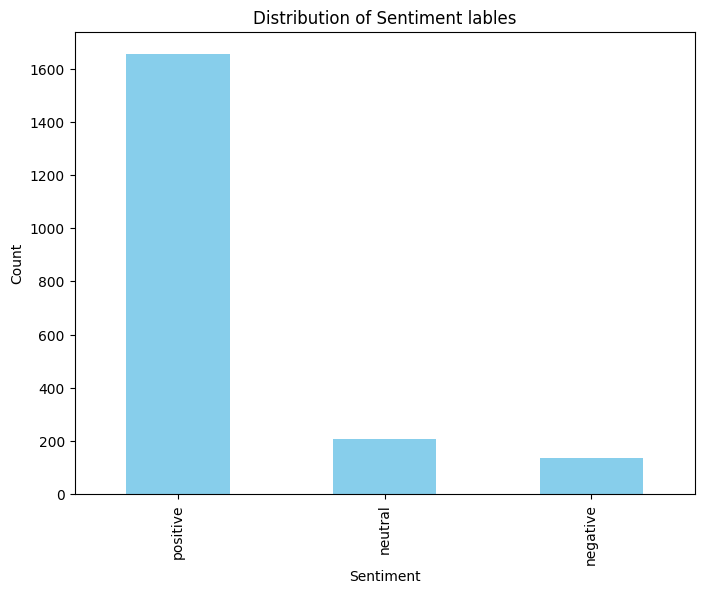

sentiment
positive    1657
neutral      207
negative     136
Name: count, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
subset_data['sentiment'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Sentiment lables')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

print(subset_data['sentiment'].value_counts())

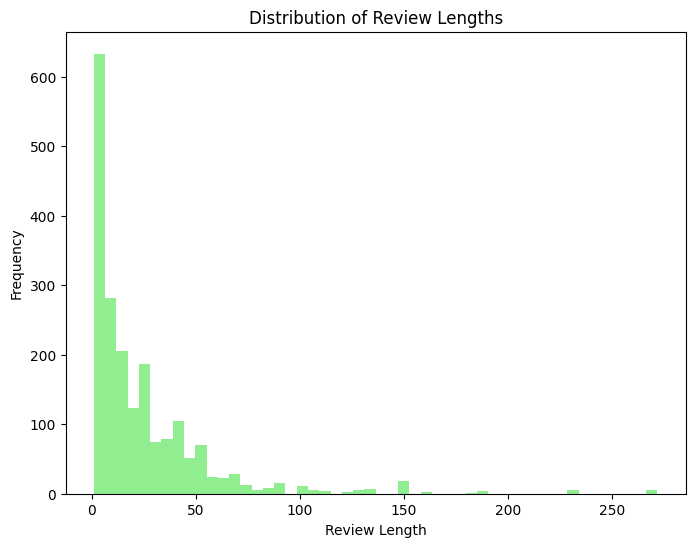

In [ ]:
subset_data['review_length'] = subset_data['reviewText'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(8, 6))
plt.hist(subset_data['review_length'], bins=50, color='lightgreen')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

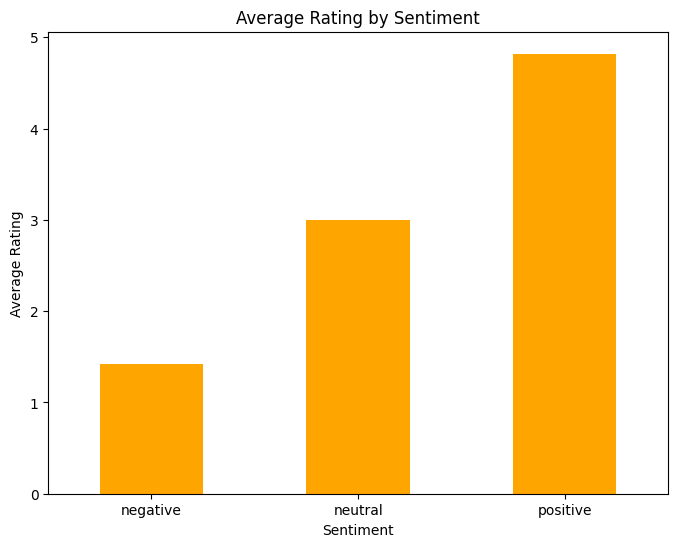

Average Rating:  sentiment
negative    1.426471
neutral     3.000000
positive    4.820157
Name: overall, dtype: float64


In [ ]:
# Calculate average rating for each sentiment category
average_rating = subset_data.groupby('sentiment')['overall'].mean()

# Plot average rating graph
plt.figure(figsize=(8, 6))
average_rating.plot(kind='bar', color='orange')
plt.title('Average Rating by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()
print('Average Rating: ', average_rating)

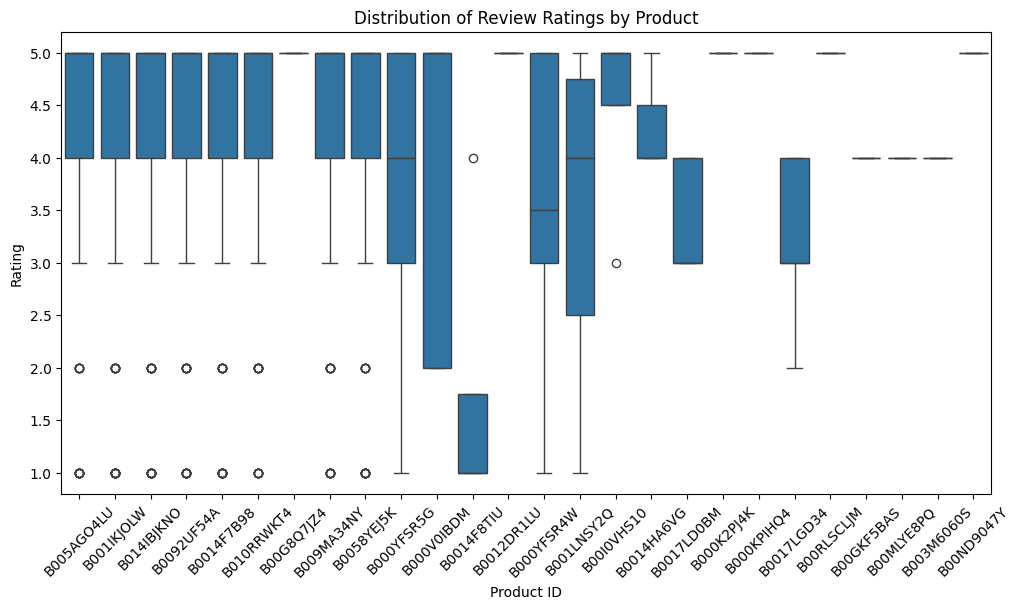

In [ ]:
# Distribution of review ratings by product
plt.figure(figsize=(12, 6))
sns.boxplot(x=subset_data['asin'], y=subset_data['overall'], data=subset_data)
plt.title('Distribution of Review Ratings by Product')
plt.xlabel('Product ID')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

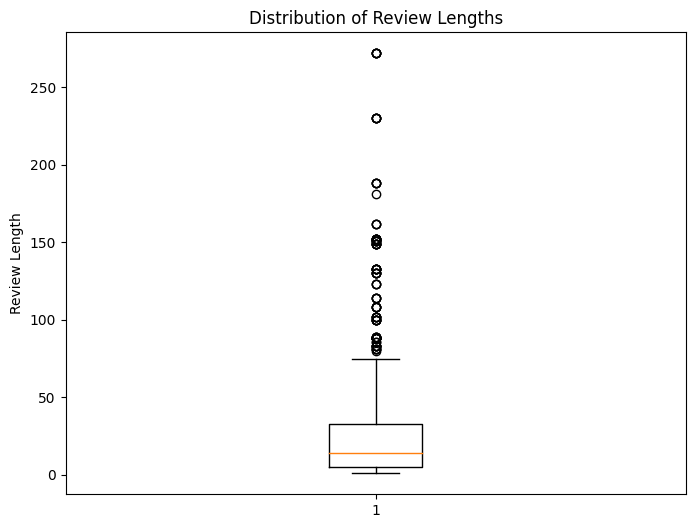

In [ ]:
# Plot boxplot for review length
plt.figure(figsize=(8, 6))
plt.boxplot(subset_data['review_length'])
plt.title('Distribution of Review Lengths')
plt.ylabel('Review Length')
plt.show()


<ipython-input-63-74c54f468f2b>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='review_length', y='sentiment', data=subset_data, palette='Set3')


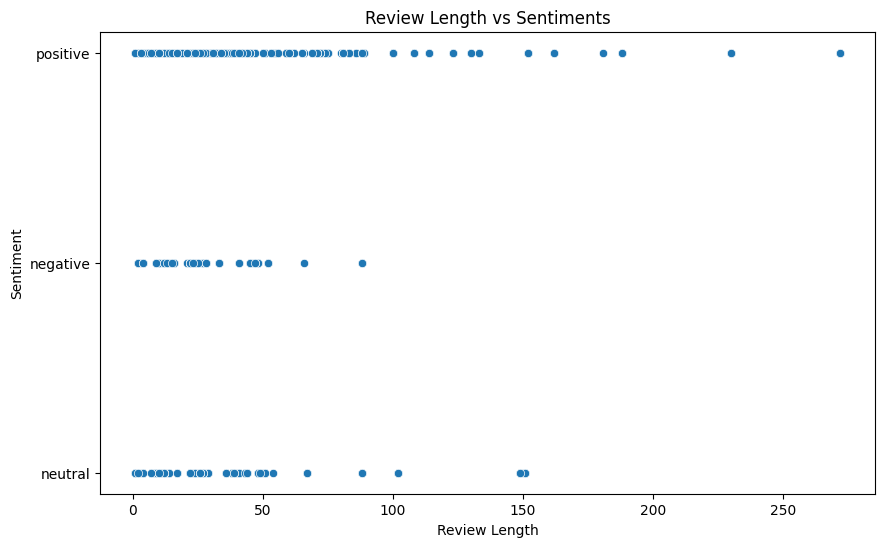

In [ ]:
# Plot scatter plot for review length vs sentiment
plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_length', y='sentiment', data=subset_data, palette='Set3')
plt.title('Review Length vs Sentiments')
plt.xlabel('Review Length')
plt.ylabel('Sentiment')
plt.show()


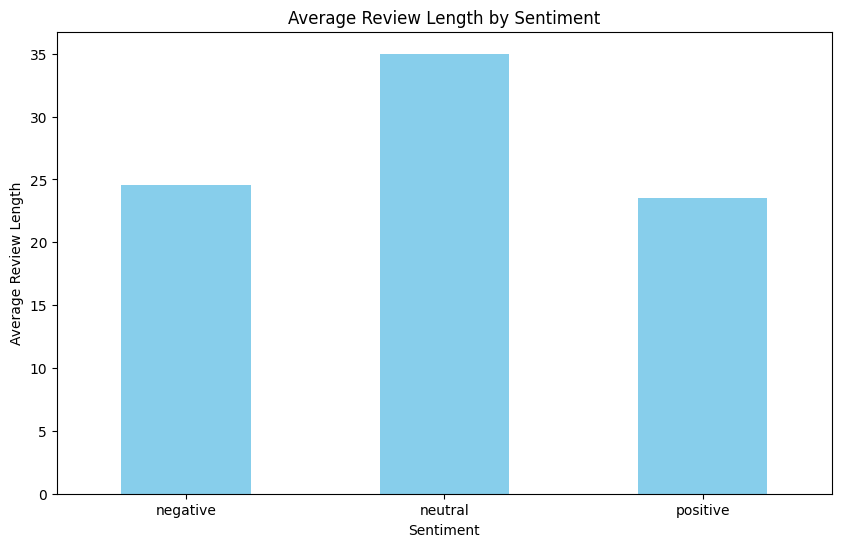

average_revire_lenght:  sentiment
negative    24.580882
neutral     35.004831
positive    23.509958
Name: review_length, dtype: float64


In [ ]:
# Calculate average review length for each sentiment category
average_review_length = subset_data.groupby('sentiment')['review_length'].mean()

# Plot bar plot for average review length by sentiment
plt.figure(figsize=(10, 6))
average_review_length.plot(kind='bar', color='skyblue')
plt.title('Average Review Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Review Length')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()
print('average_revire_lenght: ',average_review_length)

In [ ]:
# # Calculate correlation matrix for all columns in the subset_data
# correlation_matrix = subset_data.corr()

# # Plot the heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Matrix for All Columns')
# plt.show()


In [ ]:
# Drop columns
subset_data = subset_data[['overall', 'reviewText', 'reviewTextLength', 'sentiment']]

# Drop  missing values in 'reviewText'
subset_data = subset_data.dropna(subset=['reviewText'])


In [ ]:

missing_values = subset_data.isnull().sum()




print("Missing Values:")
print(missing_values)


Missing Values:
overall             0
reviewText          0
reviewTextLength    0
sentiment           0
dtype: int64


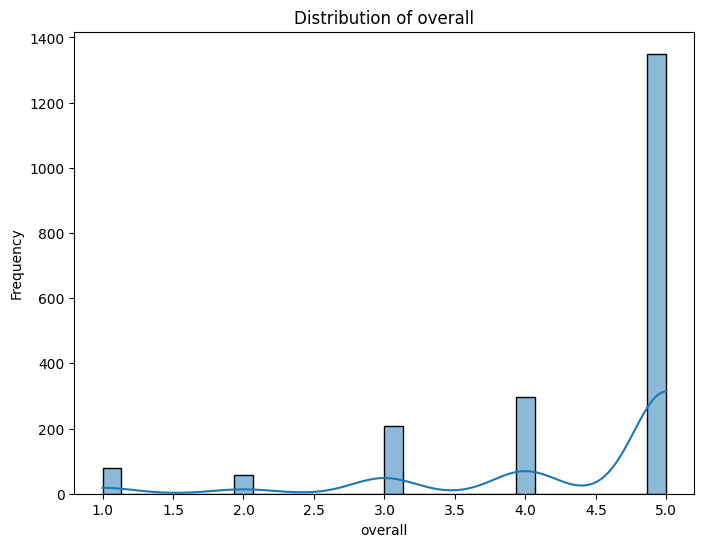

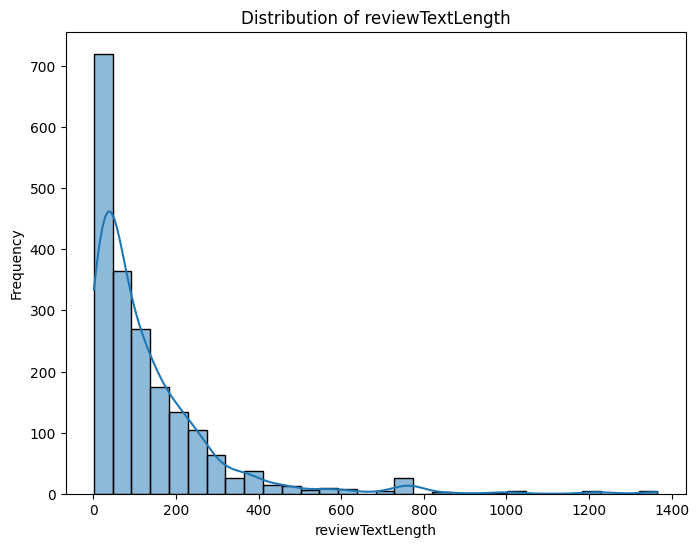

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt



# Visualize distributions of numerical features
numerical_features = subset_data.select_dtypes(include=['int64', 'float64']).columns
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=subset_data, x=feature, bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


In [ ]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
import numpy as np

def preprocess_text(text):
    # Handle missing values
    if isinstance(text, str):
        # Convert text to lowercase
        text = text.lower()
        # Remove special characters, punctuation, and numbers
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        # Tokenize the text
        tokens = word_tokenize(text)
        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word not in stop_words]
        # Lemmatization
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
        # Join tokens back into text
        processed_text = ' '.join(tokens)
        return processed_text
    else:
        return ''

# Apply preprocessing to the reviewText column
subset_data['processed_review'] = subset_data['reviewText'].apply(preprocess_text)


In [ ]:
print("First few rows of preprocessed data:")
print(subset_data[['reviewText', 'processed_review']].head(5))

First few rows of preprocessed data:
                                             reviewText  \
2270  These shoes are great.  This is the second pai...   
442   Love them!  Very comfortable and great for wei...   
2886  This is a very attractive shoe. It is true to ...   
1655                                  Very confortable.   
1001                       Fits good, very lightweight.   

                                       processed_review  
2270              shoe great second pair purchased love  
442              love comfortable great weight training  
2886  attractive shoe true size fit expected satisfi...  
1655                                        confortable  
1001                               fit good lightweight  


In [ ]:

print("Review:")
print(subset_data['reviewText'].iloc[2])
print("\nProcessed")
print(subset_data['processed_review'].iloc[2])

Review:
This is a very attractive shoe. It is true to size and fits as expected. Very satisfied with the seller - delivered on time.

Processed
attractive shoe true size fit expected satisfied seller delivered time


In [ ]:
# Represent your text using one of the text represtations discussed in the course,
# make sure to note in your report why you chose that representation.


from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Tokenize the text data
tokenized_reviews = [word_tokenize(review) for review in subset_data['processed_review']]


word2vec_model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=1, sg=1)


word_embeddings = word2vec_model.wv



# Display the size of the Word2Vec vocabulary and the dimensionality of word embeddings
print("Size of vocabulary:", len(word_embeddings.key_to_index))
print("Dimensionality of word embeddings:", word_embeddings.vector_size)



Size of vocabulary: 1261
Dimensionality of word embeddings: 100


In [ ]:
from sklearn.model_selection import train_test_split

# Define the features
X = subset_data['processed_review']
y = subset_data['sentiment']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (1393,) (1393,)
Testing set shape: (598,) (598,)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer


# Define the pipeline for Naive Bayes model
nb_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB()) #classification with discrete features (such as word counts for text classification)
])
#  hyperparameter
alpha_values = [ 0.5, 1.0, 1.5, 2.0,2.5,3.0]
param_grid = {'clf__alpha': alpha_values}

# Grid Search Cross-Validation
nb_grid_search = GridSearchCV(nb_pipeline, param_grid, cv=5, n_jobs=-1)
nb_grid_search.fit(X_train, y_train)


print("Best Parameters for Naive Bayes:", nb_grid_search.best_params_)
print("Best Score for Naive Bayes:", nb_grid_search.best_score_)


Best Parameters for Naive Bayes: {'clf__alpha': 0.5}
Best Score for Naive Bayes: 0.9246228823392899


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Define the pipeline for SVM model
svm_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', SVC(kernel='linear'))
])
# Define hyperparameters grid for SVM
svm_param_grid = {
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'tfidf__max_df': [0.5, 0.75, 1.0],       # maximum document frequency
    'tfidf__min_df': [1, 2],                  # minimum document frequency
    'clf__C': [0.1, 1, 10],                   # regularization parameter
}

# Perform Grid Search Cross-Validation for SVM
svm_grid_search = GridSearchCV(svm_pipeline, svm_param_grid, cv=5, n_jobs=-1)
svm_grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Parameters for SVM:", svm_grid_search.best_params_)
print("Best Score for SVM:", svm_grid_search.best_score_)


Best Parameters for SVM: {'clf__C': 1, 'tfidf__max_df': 0.5, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 2)}
Best Score for SVM: 0.9806142183027772


In [ ]:
# Best Naive Bayes model
from sklearn.metrics import accuracy_score

best_nb_model = nb_grid_search.best_estimator_
# Predict using the best Naive Bayes model
nb_predictions = best_nb_model.predict(X_test)

# Calculate accuracy for Naive Bayes model
nb_accuracy = accuracy_score(y_test, nb_predictions)

print("Accuracy for Naive Bayes Model:", nb_accuracy)
print("Classification Report for Naive Bayes Model:")
print(classification_report(y_test, nb_predictions))

Accuracy for Naive Bayes Model: 0.9431438127090301
Classification Report for Naive Bayes Model:
              precision    recall  f1-score   support

    negative       1.00      0.66      0.79        41
     neutral       0.88      0.74      0.81        62
    positive       0.95      0.99      0.97       495

    accuracy                           0.94       598
   macro avg       0.94      0.80      0.86       598
weighted avg       0.94      0.94      0.94       598



In [ ]:

# Best SVM model
best_svm_model = svm_grid_search.best_estimator_
# Predict using the best SVM model
svm_predictions = best_svm_model.predict(X_test)

# Calculate accuracy for SVM model
svm_accuracy = accuracy_score(y_test, svm_predictions)

print("Accuracy for SVM Model:", svm_accuracy)
print("Classification Report for SVM Model:")
print(classification_report(y_test, svm_predictions))


Accuracy for SVM Model: 0.9882943143812709
Classification Report for SVM Model:
              precision    recall  f1-score   support

    negative       1.00      0.93      0.96        41
     neutral       0.97      0.94      0.95        62
    positive       0.99      1.00      0.99       495

    accuracy                           0.99       598
   macro avg       0.99      0.95      0.97       598
weighted avg       0.99      0.99      0.99       598



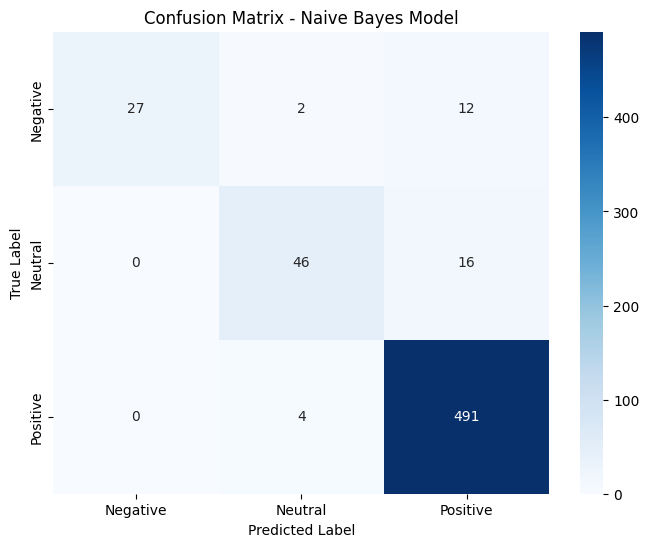

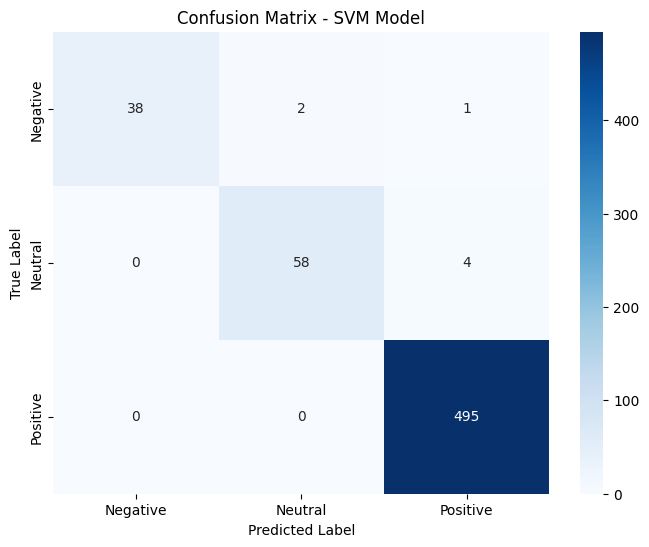

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


nb_conf_matrix = confusion_matrix(y_test, nb_predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(nb_conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix - Naive Bayes Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# Calculate confusion matrix for SVM
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix - SVM Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()




In [ ]:

# point 14
# Prepare the data for machine learning models
X_machine_learning = selected_reviews_copy['reviewText']
y_machine_learning = selected_reviews_copy['sentiment']

# Use the same preprocessed text for machine learning models as for Lexicon models
X_preprocessed_machine_learning = [preprocessing_text(text, model='textblob') for text in X_machine_learning]


X_train_ml, X_test_ml, y_train_ml, y_test_ml = train_test_split(X_preprocessed_machine_learning, y_machine_learning, test_size=0.3, stratify=y_machine_learning, random_state=42)

# Run Naive Bayes model
nb_model = nb_grid_search.best_estimator_
nb_model.fit(X_train_ml, y_train_ml)
nb_predictions = nb_model.predict(X_test_ml)





In [ ]:
# Run SVM model on the same data
svm_model = svm_grid_search.best_estimator_
svm_model.fit(X_train_ml, y_train_ml)
svm_predictions = svm_model.predict(X_test_ml)



In [ ]:
from sklearn.metrics import classification_report
nb_report_tb = classification_report(y_test_ml, nb_predictions, output_dict=True)
nb_accuracy_tb = accuracy_score(y_test_ml, nb_predictions)

# Print classification report for Naive Bayes model
print("Classification Report for Naive Bayes Model - text-blob:")
print(classification_report(y_test_ml, nb_predictions))
print("Accuracy for Naive Bayes Model - text-blob: ",nb_accuracy_tb )


Classification Report for Naive Bayes Model - text-blob:
              precision    recall  f1-score   support

    negative       1.00      0.53      0.69        19
     neutral       1.00      0.57      0.72        30
    positive       0.92      1.00      0.96       251

    accuracy                           0.93       300
   macro avg       0.97      0.70      0.79       300
weighted avg       0.93      0.93      0.92       300

Accuracy for Naive Bayes Model - text-blob:  0.9266666666666666


In [ ]:
# Print classification report for SVM model

svm_report_tb = classification_report(y_test_ml, svm_predictions, output_dict=True)

print("Classification Report for SVM Model - text_blob:")
print(classification_report(y_test_ml, svm_predictions))
svm_accuracy_tb = accuracy_score(y_test_ml, svm_predictions)

print("Accuracy for SVM Model - text-blob: ",svm_accuracy_tb )




Classification Report for SVM Model - text_blob:
              precision    recall  f1-score   support

    negative       1.00      0.84      0.91        19
     neutral       1.00      0.73      0.85        30
    positive       0.96      1.00      0.98       251

    accuracy                           0.96       300
   macro avg       0.99      0.86      0.91       300
weighted avg       0.96      0.96      0.96       300

Accuracy for SVM Model - text-blob:  0.9633333333333334


In [ ]:
# point 14
#
X_machine_learning = selected_reviews_copy['reviewText']
y_machine_learning = selected_reviews_copy['sentiment']

# Use the same preprocessed text for machine learning models
X_preprocessed_machine_learning = [preprocessing_text(text, model='vader') for text in X_machine_learning]


X_train_ml, X_test_ml, y_train_ml, y_test_ml = train_test_split(X_preprocessed_machine_learning, y_machine_learning, test_size=0.3, stratify=y_machine_learning, random_state=42)

# Run Naive Bayes model on the same data
nb_model_v = nb_grid_search.best_estimator_
nb_model_v.fit(X_train_ml, y_train_ml)
nb_predictions_v = nb_model.predict(X_test_ml)

In [ ]:
# Run SVM model on the same data
svm_model_v = svm_grid_search.best_estimator_
svm_model_v.fit(X_train_ml, y_train_ml)
svm_predictions_v = svm_model.predict(X_test_ml)

In [ ]:
from sklearn.metrics import classification_report
nb_report_v = classification_report(y_test_ml, nb_predictions_v, output_dict=True)

# Print classification report for Naive Bayes model
print("Classification Report for Naive Bayes Model - vader:")
print(classification_report(y_test_ml, nb_predictions_v))
nb_accuracy_v = accuracy_score(y_test_ml, nb_predictions_v)
print('Accuracy for Naive Bayes Model - vader: ',nb_accuracy_v)


Classification Report for Naive Bayes Model - vader:
              precision    recall  f1-score   support

    negative       1.00      0.26      0.42        19
     neutral       1.00      0.23      0.38        30
    positive       0.87      1.00      0.93       251

    accuracy                           0.88       300
   macro avg       0.96      0.50      0.58       300
weighted avg       0.89      0.88      0.84       300

Accuracy for Naive Bayes Model - vader:  0.8766666666666667


In [ ]:
# Print classification report for SVM model

svm_report_v = classification_report(y_test_ml, svm_predictions_v, output_dict=True)

print("Classification Report for SVM Model - vader:")
print(classification_report(y_test_ml, svm_predictions_v))
svm_accuracy_v = accuracy_score(y_test_ml, svm_predictions_v)
print('Accuracy for SVM Model - vader: ',svm_accuracy_v)


Classification Report for SVM Model - vader:
              precision    recall  f1-score   support

    negative       0.88      0.74      0.80        19
     neutral       1.00      0.73      0.85        30
    positive       0.96      1.00      0.98       251

    accuracy                           0.96       300
   macro avg       0.94      0.82      0.87       300
weighted avg       0.96      0.96      0.95       300

Accuracy for SVM Model - vader:  0.9566666666666667


In [ ]:
comparison_df = pd.DataFrame({
    'Model': ['VADER', 'TextBlob', 'Naive Bayes (TextBlob)', 'SVM (TextBlob)', 'Naive Bayes (VADER)', 'SVM (VADER)'],
    'Precision': [
        vader_report['weighted avg']['precision'],
        textblob_report['weighted avg']['precision'],
        nb_report_tb['weighted avg']['precision'],
        svm_report_tb['weighted avg']['precision'],
        nb_report_v['weighted avg']['precision'],
        svm_report_v['weighted avg']['precision']
    ],
    'Recall': [
        vader_report['weighted avg']['recall'],
        textblob_report['weighted avg']['recall'],
        nb_report_tb['weighted avg']['recall'],
        svm_report_tb['weighted avg']['recall'],
        nb_report_v['weighted avg']['recall'],
        svm_report_v['weighted avg']['recall']
    ],
    'F1-score': [
        vader_report['weighted avg']['f1-score'],
        textblob_report['weighted avg']['f1-score'],
        nb_report_tb['weighted avg']['f1-score'],
        svm_report_tb['weighted avg']['f1-score'],
        nb_report_v['weighted avg']['f1-score'],
        svm_report_v['weighted avg']['f1-score']
    ],
    'Accuracy':[vader_accuracy, textblob_accuracy, nb_accuracy_tb, svm_accuracy_tb, nb_accuracy_v, svm_accuracy_v]
})

# Display the comparison DataFrame
print("Comparison of Classification Reports:")
print(comparison_df)

Comparison of Classification Reports:
                    Model  Precision    Recall  F1-score  Accuracy
0                   VADER   0.791027  0.812000  0.800768  0.812000
1                TextBlob   0.783151  0.811000  0.796154  0.811000
2  Naive Bayes (TextBlob)   0.932576  0.926667  0.917558  0.926667
3          SVM (TextBlob)   0.964873  0.963333  0.961247  0.963333
4     Naive Bayes (VADER)   0.892512  0.876667  0.843460  0.876667
5             SVM (VADER)   0.956956  0.956667  0.954008  0.956667


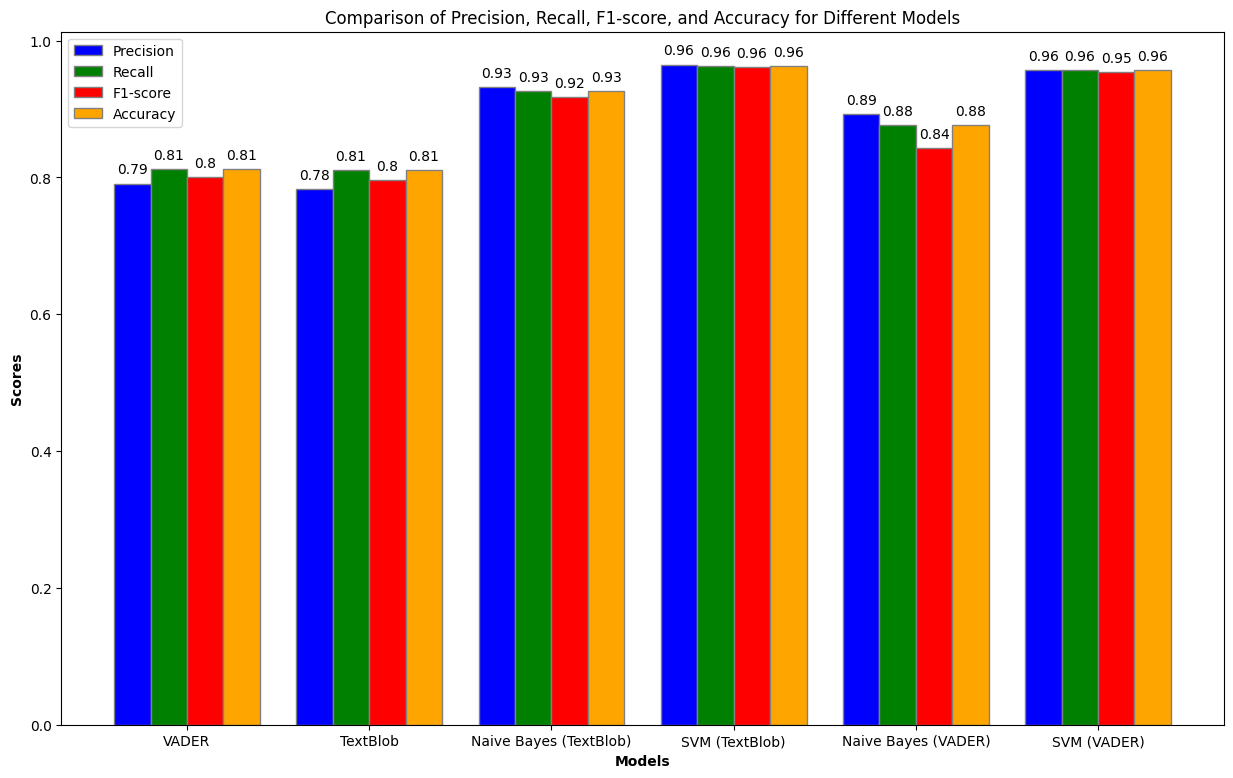

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 9))


models = comparison_df['Model']
precision_scores = comparison_df['Precision']
recall_scores = comparison_df['Recall']
f1_scores = comparison_df['F1-score']
accuracy_scores = comparison_df['Accuracy']

bar_width = 0.2

# Set the positions
r1 = range(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]


bars1 = plt.bar(r1, precision_scores, color='b', width=bar_width, edgecolor='grey', label='Precision')
bars2 = plt.bar(r2, recall_scores, color='g', width=bar_width, edgecolor='grey', label='Recall')
bars3 = plt.bar(r3, f1_scores, color='r', width=bar_width, edgecolor='grey', label='F1-score')
bars4 = plt.bar(r4, accuracy_scores, color='orange', width=bar_width, edgecolor='grey', label='Accuracy')  # New addition

# Add scores on top
for bars, scores in zip([bars1, bars2, bars3, bars4], [precision_scores, recall_scores, f1_scores, accuracy_scores]):
    for bar, score in zip(bars, scores):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, round(score, 2), ha='center', va='bottom')

# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + 1.5 * bar_width for r in range(len(models))], models)  # Adjust the multiplier (1.5) as needed

# Add y label and title
plt.ylabel('Scores', fontweight='bold')
plt.title('Comparison of Precision, Recall, F1-score, and Accuracy for Different Models')

# Add legend
plt.legend()

# Show plot
plt.show()


In [ ]:
# 15 - calculated weight rating -explanation in the next cell


# This function takes a review text as input and extracts topics based on predefined keywords.
# It returns a list of topics present in the review.

def extract_topics(review_text):
    # Dummy implementation: Extracting topics based on keywords
    keywords = ['comfort', 'fit', 'style', 'quality', 'price']
    topics = []
    for keyword in keywords:
        if keyword in review_text:
            topics.append(keyword)
    return topics

# This function calculates the weighted ratings for each review in the dataset.
# It iterates through each review, extracts topics, calculates the weight based
# on the user's topic profile, and then computes the weighted rating as the product
# of the weight and the star rating of the review.
def calculate_weighted_ratings(user_topic_profile, review_dataset):
    weighted_ratings = []
    for index, row in review_dataset.iterrows():
        review_text = preprocess_text(row['reviewText'])
        review_topics = extract_topics(review_text)
        star_rating = row['overall']
        weight = calculate_weight_for_review(user_topic_profile, review_topics)
        weighted_rating = weight * star_rating
        weighted_ratings.append(weighted_rating)
    return weighted_ratings

# This function calculates the weight for a review based on the intersection
#  of topics present in the review and the user's topic profile. The weight
# is the ratio of the number of common topics to the total number of topics in the user's profile.
def calculate_weight_for_review(user_topic_profile, review_topics):
    common_topics = set(user_topic_profile).intersection(review_topics)
    if common_topics:
        weight = len(common_topics) / len(user_topic_profile)
    else:
        weight = 0
    return weight


user_topic_profile = ['comfort', 'fit', 'style','price','quality']

# Calculate the weighted ratings
weighted_ratings = calculate_weighted_ratings(user_topic_profile, subset_data)

# Add the weighted ratings to the dataset
subset_data['weighted_rating'] = weighted_ratings

# Displaying the 'reviewText' and 'weighted_rating' columns
print(subset_data[['reviewText', 'weighted_rating']].head(10))


                                             reviewText  weighted_rating
2270  These shoes are great.  This is the second pai...              0.0
442   Love them!  Very comfortable and great for wei...              1.0
2886  This is a very attractive shoe. It is true to ...              1.0
1655                                  Very confortable.              0.0
1001                       Fits good, very lightweight.              0.8
2564  I love these shoes my second pair of 40 plus $...              1.0
1771      The shoe fit has expected. It is comfortable.              2.0
2339                      very nice...quick shipment...              0.0
214   Absolutly love these shoes!! Beautiful color, ...              0.0
1566  Love my new Nike's.  It's been years since I'v...              1.0


In [ ]:
print("Review Text:", subset_data.iloc[4]['reviewText'])
print("Weighted Rating:", subset_data.iloc[4]['weighted_rating'])

Review Text: Fits good, very lightweight.
Weighted Rating: 0.8


In [ ]:
import pandas as pd
import torch
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

# Load the pre-trained language model and tokenizer
model_name = "t5-small"
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Assuming `subset_data` and `selected_reviews` are defined
subset_data = subset_data.dropna(subset=['reviewText'])
selected_reviews = subset_data[subset_data['reviewText'].apply(lambda x: len(x.split()) > 100)].head(10)

# Function to generate summary
def generate_summary(review_text):
    inputs = tokenizer.encode("summarize: " + review_text, return_tensors="pt", max_length=512, truncation=True)
    outputs = model.generate(inputs, max_length=50, min_length=10, length_penalty=2.0, num_beams=4, early_stopping=True)
    summary = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return summary

# Lists to store data
original_reviews = []
generated_summaries = []
initial_lengths = []
summary_lengths = []

# Generate summaries and store them along with the original reviews in lists
for i, review_text in enumerate(selected_reviews['reviewText']):
    summary = generate_summary(review_text)
    original_reviews.append(review_text)
    generated_summaries.append(summary)
    initial_lengths.append(len(review_text.split()))
    summary_lengths.append(len(summary.split()))

# Create DataFrame
summary_comparison_df = pd.DataFrame({
    'Original Review': original_reviews,
    'Generated Summary': generated_summaries,
    'Initial Length': initial_lengths,
    'Summary Length': summary_lengths
})

# Save DataFrame to CSV file
summary_comparison_df.to_csv('summary_comparison_with_lengths.csv', index=False)

# Display confirmation message
print("DataFrame saved to 'summary_comparison_with_lengths.csv'")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

DataFrame saved to 'summary_comparison_with_lengths.csv'


In [ ]:
summary_comparison_df = pd.read_csv('summary_comparison_with_lengths.csv')


In [ ]:
summary_comparison_df


,Original Review,Generated Summary,Initial Length,Summary Length
0,i bought a pair from DSW for 50$ and they are ...,i bought a pair from dSW for 50$ and they are ...,152,37
1,Favorite training and walking-around sneakers....,flex supreme TR 3s have lasted for a good 2 ye...,230,36
2,"Super light-weight, decent arch support (mine ...",shoes arrived with an odd yellowish color on s...,188,32
3,Great shoe. I've had Nike's before and have al...,this shoe is a great choice for heavy running ...,133,21
4,Very good overall.\nNow Ive been a huge Sketch...,Sketchers Go Walk fan has been using these sho...,162,36
5,"Super light-weight, decent arch support (mine ...",shoes arrived with an odd yellowish color on s...,188,32
6,I LOVE the look and comfort of these shoes for...,I run about 2-4 miles a week and then sprints ...,149,27
7,I was wearing running shoes for cardio dance c...,i was wearing running shoes for cardio dance c...,108,33
8,This is the most comfortable shoe I've ever ha...,this is the most comfortable shoe I've ever ha...,114,28
9,Glad I read the reviews and ordered a half siz...,these are light weight. I worked out in them l...,123,27


In [ ]:
# Print the first review and its generated summary
print("First review:")
print(summary_comparison_df['Original Review'].iloc[2])
print("\nGenerated Summary:")
print(summary_comparison_df['Generated Summary'].iloc[2])


First review:
Super light-weight, decent arch support (mine is higher than average).  I was pleasantly surprised by the sole/tread on these for my circuit training classes, as I couldn't really tell by online pics.  Also pleasantly surprised that these ran ever so slightly bigger than Nike running shoes I use to wear 15+years ago - I always wore one to 1.5 sizes larger in their "Hurache's"/running shoes, so I was really worried my size 6 would be too small - there is actually more toe room in these shoes than any other size 6 shoe I own (athletic, heel, boot).  But it is the correct amount of room from big toe to edge of shoe for me (an inch or less, I don't want my big toe being jammed into edge of shoe when lunging, jumping, etc.).  Shoes arrived with an odd yellowish color on side of one shoe, but no damage to box, paper lining etc - I was happy that a clorox wipe easily cleaned the shoe and did not discolor any further.  I am very happy and highly recommend, although I have only wo

In [ ]:
# 17


import pandas as pd
from transformers import AutoModelForCausalLM, AutoTokenizer

#  pre-trained language model and tokenizer
model_name = "gpt2"
model = AutoModelForCausalLM.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)



# review with a question nature
question_review = subset_data[subset_data['reviewText'].str.contains('\?')].iloc[0]['reviewText']

def generate_response(question):
    input_text = "Customer: " + question + " Service Representative:"
    input_ids = tokenizer.encode(input_text, return_tensors="pt", max_length=512, truncation=True)
    output_ids = model.generate(input_ids, max_length=100, num_return_sequences=1, early_stopping=True)
    response = tokenizer.decode(output_ids[0], skip_special_tokens=True)
    return response

# Generate a response
service_response = generate_response(question_review)




config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:453: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [ ]:
print("\nSelected Review with Question Nature:", question_review)
print("\nGenerated Service Representative Response:", service_response)


Selected Review with Question Nature: It's hard to find a lightweight athletic shoe with a wide toe box. This shoe has that. I am happy with the support for walking and everyday wear. I wouldn't run in them. Now I just have to stock up on as many pair as I can afford before Nike discontinues them :). Don't you hate when that happens?

Generated Service Representative Response: Customer: It's hard to find a lightweight athletic shoe with a wide toe box. This shoe has that. I am happy with the support for walking and everyday wear. I wouldn't run in them. Now I just have to stock up on as many pair as I can afford before Nike discontinues them :). Don't you hate when that happens? Service Representative: I'm sorry, but I can't find a shoe that is as good as this. I'm sorry, but I can't
